<a href="https://colab.research.google.com/github/GangaramGavade/projects/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('/content/car data.csv')

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
df["Diff_price"] = df["Present_Price"] - df["Selling_Price"]

In [8]:
df.head(15)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Diff_price
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,0.58
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,1.37
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,2.11
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,0.14
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0,1.47


In [9]:
car_dataset = df.drop(['Car_Name'],axis=1)

In [10]:
car_dataset['Current_year'] = 2023

In [11]:
car_dataset["Number_of_years"] = car_dataset['Current_year'] - car_dataset['Year']

In [12]:
car_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Diff_price,Current_year,Number_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27,2023,9


In [13]:
car_dataset = car_dataset.drop(['Year','Current_year'],axis=1)

In [14]:
car_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Diff_price,Number_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27,9


In [15]:
car_dataset = pd.get_dummies(car_dataset,drop_first=True)
car_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Diff_price,Number_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2.24,9,0,1,0,1
1,4.75,9.54,43000,0,4.79,10,1,0,0,1
2,7.25,9.85,6900,0,2.60,6,0,1,0,1
3,2.85,4.15,5200,0,1.30,12,0,1,0,1
4,4.60,6.87,42450,0,2.27,9,1,0,0,1


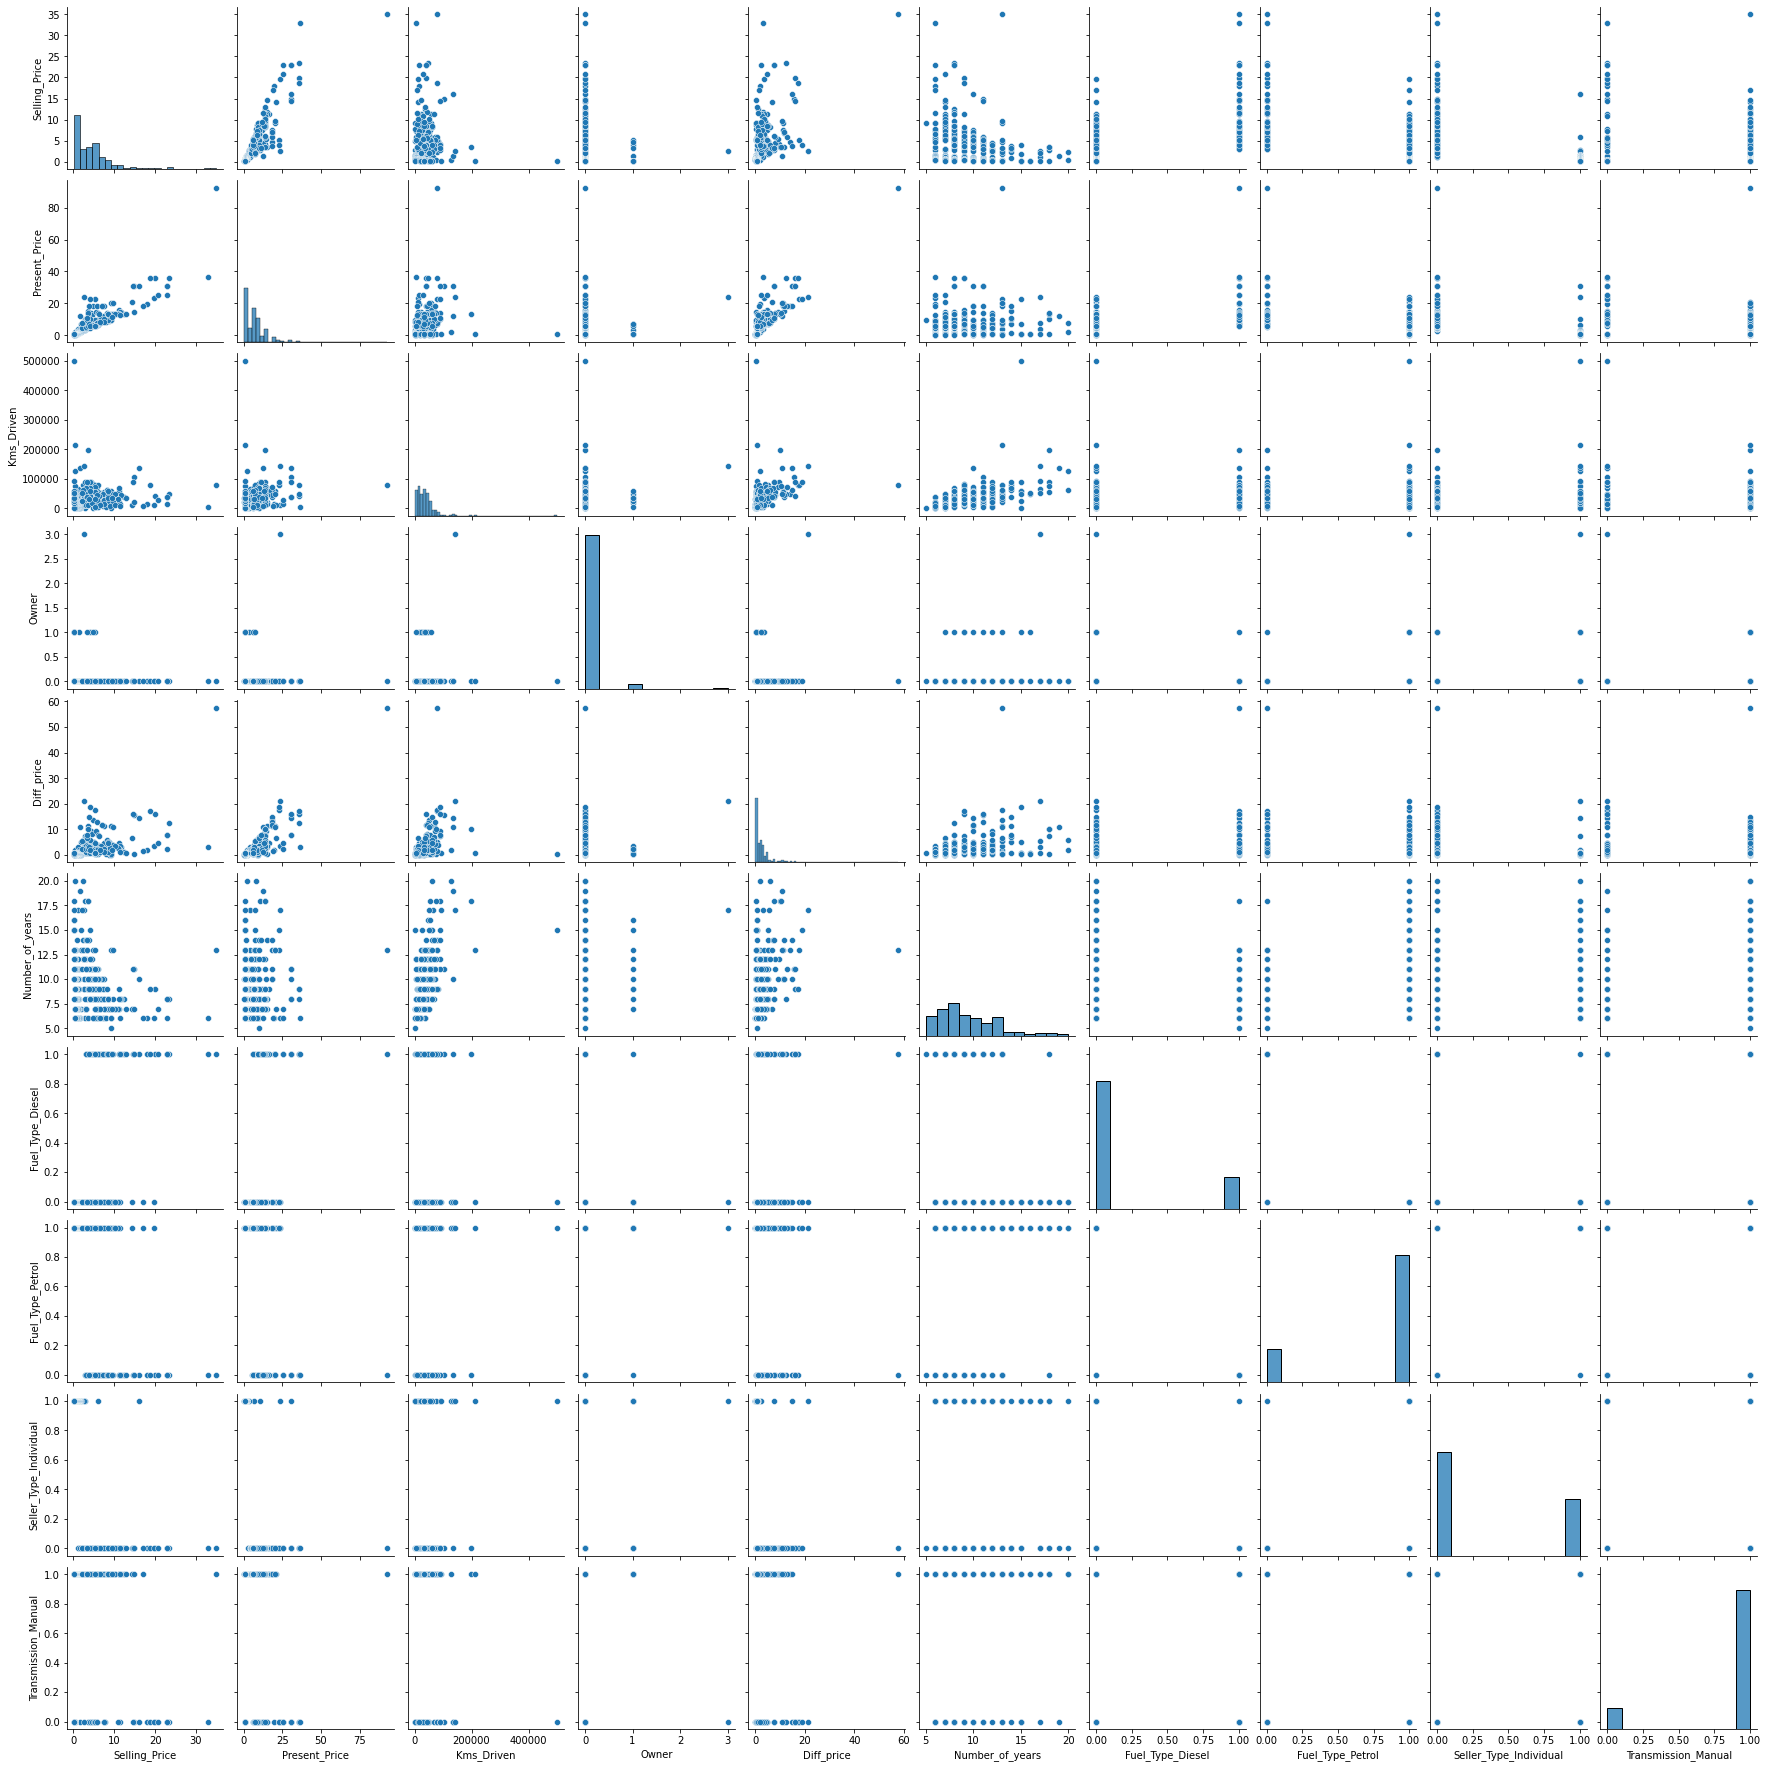

In [16]:
sns.pairplot(car_dataset)

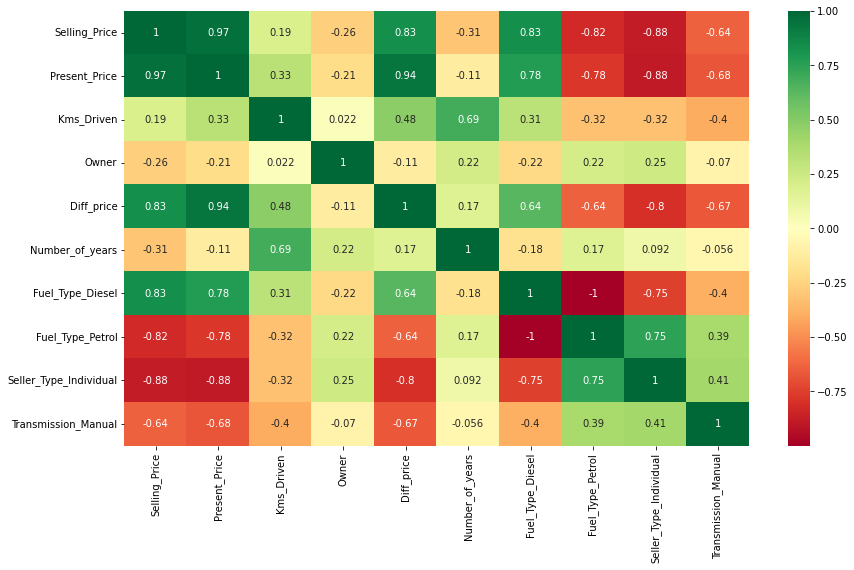

In [17]:
correlation = car_dataset.corr()
plt.figure(figsize=(14,8))
sns.heatmap(correlation.corr(), annot=True,cmap="RdYlGn")

In [18]:
car_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Diff_price,Number_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2.24,9,0,1,0,1
1,4.75,9.54,43000,0,4.79,10,1,0,0,1
2,7.25,9.85,6900,0,2.60,6,0,1,0,1
3,2.85,4.15,5200,0,1.30,12,0,1,0,1
4,4.60,6.87,42450,0,2.27,9,1,0,0,1


In [19]:
X = car_dataset.iloc[:,1:]
y = car_dataset.iloc[:,0]

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [22]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [23]:
print(model.feature_importances_)

[0.34050607 0.02855219 0.00086593 0.06720487 0.05935454 0.23322881
 0.00617654 0.12339178 0.14071927]


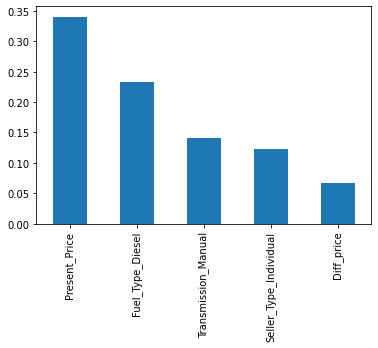

In [24]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='bar')
plt.show()

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf_Random = RandomForestRegressor()

In [27]:
n_estimators=[int(x) for x in np.linspace(start = 100, stop=1200, num=12)]

# no. of features to consider at every split
max_features=['auto','sqrt']

#Max no of level in trees
max_depth=[int(x) for x in np.linspace(5,30, num=6)]

# maxDepth.appends(None)
# minimum no of samples req to split a node

min_samples_split=[2,5,10,100]

# minimum no of samples req at each leaf node
min_samples_leaf = [1,2,5,10]

In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
random_grid = {'n_estimators':n_estimators,
                "max_features":max_features,
                "max_depth":max_depth,
                "min_samples_split":min_samples_split,
                'min_samples_leaf':min_samples_leaf}

In [30]:
rf = RandomForestRegressor()

In [31]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions =random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [32]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   1.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   1.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   1.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   1.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   1.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   1.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   1.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [33]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [34]:
predictions=rf_random.predict(X_test)
predictions

array([ 5.24499526,  0.27395055,  1.40487068, 21.17749185, 10.04338393,
        6.73462937,  0.85100236,  7.55597809,  4.79503248,  1.15202509,
        0.91788756, 18.20303846,  0.46833964,  4.88106885,  2.71705564,
        7.55597809,  2.96295576,  8.85244407,  4.14987582, 14.17279086,
        4.51229458,  9.74116195,  8.48671891,  0.65586778,  3.11837323,
        0.23084945,  0.49782953,  1.14162562,  4.8511572 ,  5.96012936,
       21.13191727,  6.1133679 ,  7.14789149, 11.08213035,  5.71140255,
        0.28769089,  0.37967518,  0.58762898,  0.20711939,  3.3687961 ,
        0.46803243,  5.28441348,  5.36447325,  4.2538899 ,  5.10283959,
        2.83049646,  4.758844  ,  5.05673445,  5.65563257,  9.98623007,
        9.22493846,  0.49262715,  0.27649955,  2.80093352,  3.59592277,
        5.38950546,  5.2252993 ,  5.65309429,  0.53128318,  4.98997177,
        0.21658989])

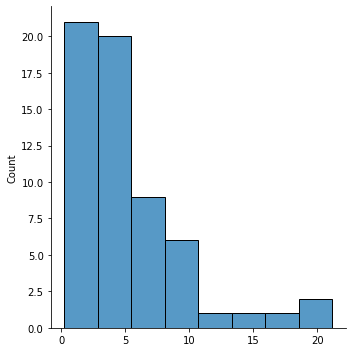

In [35]:
sns.displot(predictions)

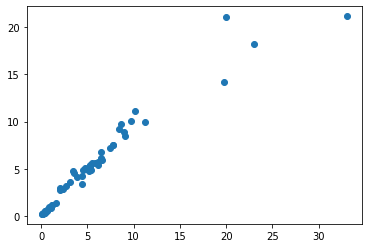

In [36]:
plt.scatter(y_test,predictions)